# Global Temperature Time Series

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Unzip and load the dataset
zip_file_path = 'Global Temperature Time Series.zip'
extracted_folder = 'Global_Temperature_Data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

csv_file_path = extracted_folder + 'monthly_csv.csv'
temperature_data = pd.read_csv(csv_file_path)

In [3]:
# Step 2: Initial data inspection
print("First few rows of the dataset:")
print(temperature_data.head())

print("\nColumns in the dataset:")
print(temperature_data.columns)

print("\nMissing values in the dataset:")
print(temperature_data.isnull().sum())

First few rows of the dataset:
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292

Columns in the dataset:
Index(['Source', 'Date', 'Mean'], dtype='object')

Missing values in the dataset:
Source    0
Date      0
Mean      0
dtype: int64


In [4]:
# Convert Date to datetime and extract Year
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])
temperature_data['Year'] = temperature_data['Date'].dt.year

In [5]:
# Check for missing values in 'Mean' and interpolate
if temperature_data['Mean'].isnull().any():
    print("\nInterpolating missing values in 'Mean'...")
    temperature_data['Mean'] = temperature_data['Mean'].interpolate(method='linear', limit_direction='both')

print("\nMissing values after interpolation:")
print(temperature_data.isnull().sum())


Missing values after interpolation:
Source    0
Date      0
Mean      0
Year      0
dtype: int64


In [6]:
# Identify and handle outliers in 'Mean'
# Use Z-scores to identify outliers
mean_z_scores = (temperature_data['Mean'] - temperature_data['Mean'].mean()) / temperature_data['Mean'].std()
outliers = temperature_data[np.abs(mean_z_scores) > 3]

print(f"\nNumber of outliers in 'Mean': {len(outliers)}")
if not outliers.empty:
    print(outliers)

# Option 1: Remove outliers (optional, based on use case)
temperature_data = temperature_data[np.abs(mean_z_scores) <= 3]


Number of outliers in 'Mean': 11
     Source       Date    Mean  Year
16     GCAG 2016-04-06  1.0733  2016
17  GISTEMP 2016-04-06  1.0900  2016
18     GCAG 2016-03-06  1.2245  2016
19  GISTEMP 2016-03-06  1.3000  2016
20     GCAG 2016-02-06  1.1921  2016
21  GISTEMP 2016-02-06  1.3500  2016
22     GCAG 2016-01-06  1.0569  2016
23  GISTEMP 2016-01-06  1.1700  2016
24     GCAG 2015-12-06  1.1219  2015
25  GISTEMP 2015-12-06  1.1100  2015
29  GISTEMP 2015-10-06  1.0600  2015


In [7]:
# Normalize the 'Mean' column (Min-Max Scaling)
temperature_data['Mean_Normalized'] = (temperature_data['Mean'] - temperature_data['Mean'].min()) / \
                                      (temperature_data['Mean'].max() - temperature_data['Mean'].min())


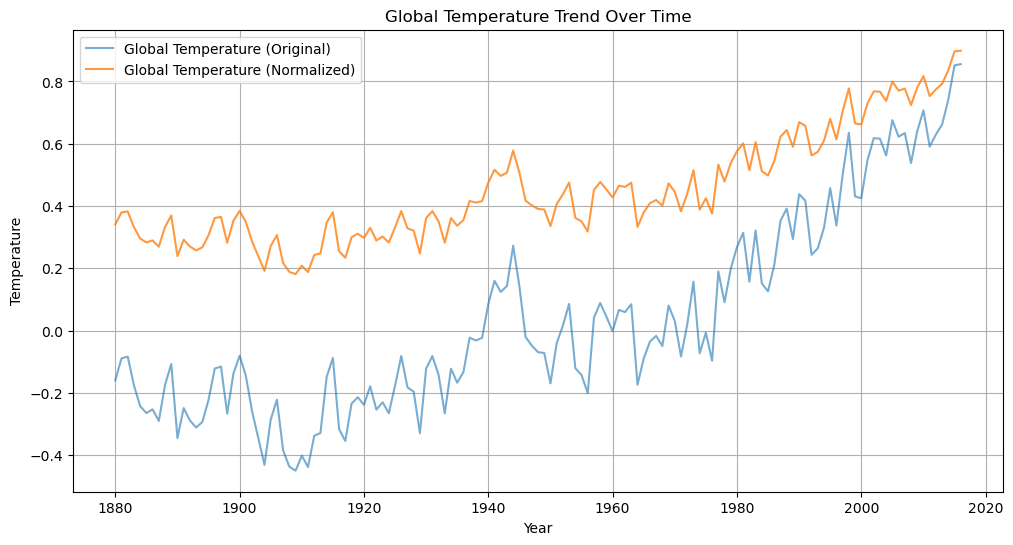

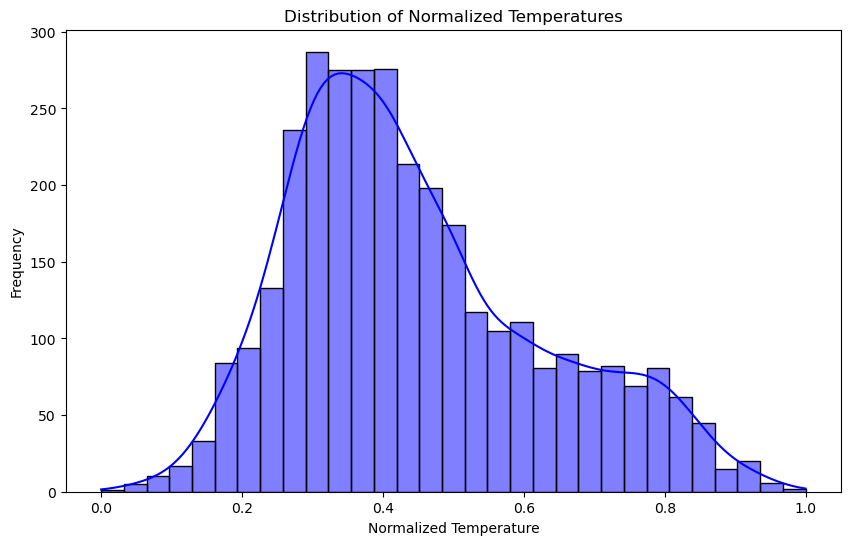

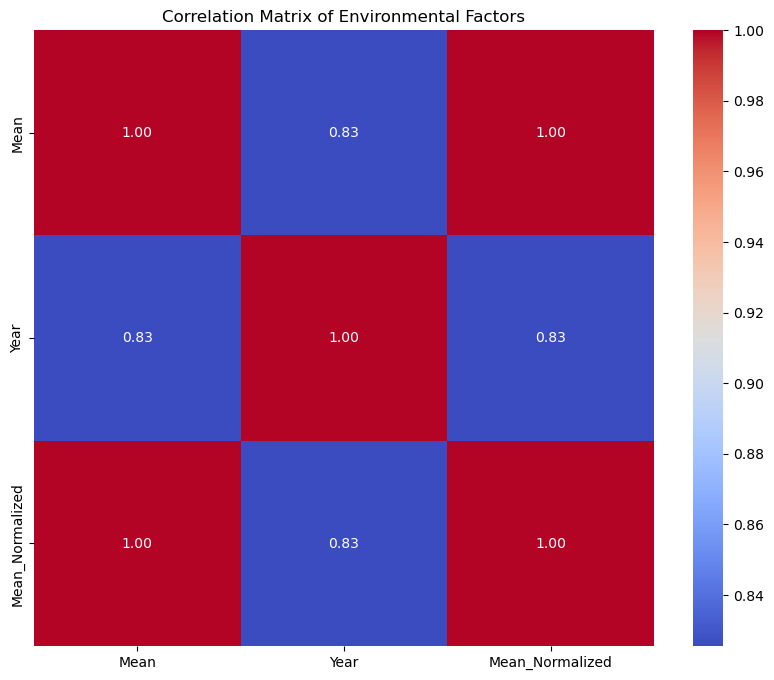

In [8]:
# Visualizations
# Plot the global temperature trend by year
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.groupby('Year')['Mean'].mean(), label='Global Temperature (Original)', alpha=0.6)
plt.plot(temperature_data.groupby('Year')['Mean_Normalized'].mean(), label='Global Temperature (Normalized)', alpha=0.8)
plt.title('Global Temperature Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the distribution of normalized temperatures
plt.figure(figsize=(10, 6))
sns.histplot(temperature_data['Mean_Normalized'], kde=True, color='blue')
plt.title('Distribution of Normalized Temperatures')
plt.xlabel('Normalized Temperature')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis
# Exclude non-numeric columns
numeric_data = temperature_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Environmental Factors')
plt.show()

In [9]:
# Save the cleaned and transformed dataset for future use
cleaned_csv_file_path = extracted_folder + 'cleaned_temperature_data.csv'
temperature_data.to_csv(cleaned_csv_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_csv_file_path}")


Cleaned dataset saved to: Global_Temperature_Data/cleaned_temperature_data.csv
